In [1]:
from geopy.geocoders import Nominatim
from osgeo import gdal, osr, ogr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from bs4 import BeautifulSoup
import requests 
import shapefile
from shapely.geometry import Polygon

In [2]:
address = "Kasteelplein 1, 2300 Turnhout"

In [3]:
def createSmallRaster(raster_ds, x, y, filename):
    dem = raster_ds
    gt = dem.GetGeoTransform()

    # get coordinates of upper left corner
    xmin = gt[0]
    ymax = gt[3]
    res = gt[1]

    # determine total length of raster
    xlen = res * dem.RasterXSize
    ylen = res * dem.RasterYSize

    # number of tiles in x and y direction
    xdiv = 200
    ydiv = 200

    # size of a single tile
    xsize = xlen/xdiv
    ysize = ylen/ydiv

    # create lists of x and y coordinates
    xsteps = [xmin + xsize * i for i in range(xdiv+1)]
    ysteps = [ymax - ysize * i for i in range(ydiv+1)]

    # loop over min and max x and y coordinates
    for i in range(xdiv):
        for j in range(ydiv):
            xmin = xsteps[i]
            xmax = xsteps[i+1]
            ymax = ysteps[j]
            ymin = ysteps[j+1]

            # use gdal warp
            if((x>=xmin and x<=xmax) and (y>=ymin and y<=ymax)):
#                 print("polygon = ",polygon)
                gdal.Warp("geo-files/temp_files/"+filename+".tif", dem, 
                          outputBounds = (xmin, ymin, xmax, ymax), dstNodata = -9999)
                

In [20]:
def get_coordinates(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q="+address).json()
#     print(req)
    info = {'address' : address, 
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    
#     print(detail)
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    print(build)
    info['polygon'] = [build['geometriePolygoon']['polygon']]
#     points = info['polygon'][0]['coordinates'][0] 
    return info


In [31]:
coordinates = get_coordinates(address)
x_coordinate = coordinates['x_value']
y_coordinate = coordinates['y_value']

polygon = coordinates['polygon'][0]['coordinates'][0]

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouw/11195383', 'naamruimte': 'https://data.vlaanderen.be/id/gebouw', 'objectId': '11195383', 'versieId': '2011-05-19T15:56:04+02:00'}, 'geometriePolygoon': {'polygon': {'coordinates': [[[190246.80202307552, 224044.05999746546], [190239.8010630682, 224046.38294146955], [190237.82320706546, 224040.54242946208], [190220.13885505497, 224046.86998146772], [190209.9166470468, 224017.93942144886], [190209.28867904842, 224018.15689344704], [190206.45693504065, 224019.13762944937], [190203.0089990422, 224008.9510054402], [190214.9869830534, 224004.9109414406], [190216.19760704786, 224008.50031744316], [190239.6020230651, 224000.2600614354], [190243.74410306662, 224013.55900544673], [190251.1810310781, 224010.88598144427], [190254.2069510743, 224019.68802944943], [190247.3671430722, 224022.13807745278], [190252.07895107567, 224035.82102146], [190244.7435270697, 224038.15702146292], [190246.80202307552, 224044.05999746546]], [[190239.7150

In [32]:
polygon

[[190246.80202307552, 224044.05999746546],
 [190239.8010630682, 224046.38294146955],
 [190237.82320706546, 224040.54242946208],
 [190220.13885505497, 224046.86998146772],
 [190209.9166470468, 224017.93942144886],
 [190209.28867904842, 224018.15689344704],
 [190206.45693504065, 224019.13762944937],
 [190203.0089990422, 224008.9510054402],
 [190214.9869830534, 224004.9109414406],
 [190216.19760704786, 224008.50031744316],
 [190239.6020230651, 224000.2600614354],
 [190243.74410306662, 224013.55900544673],
 [190251.1810310781, 224010.88598144427],
 [190254.2069510743, 224019.68802944943],
 [190247.3671430722, 224022.13807745278],
 [190252.07895107567, 224035.82102146],
 [190244.7435270697, 224038.15702146292],
 [190246.80202307552, 224044.05999746546]]

In [33]:
coordinates['polygon'][0]['coordinates'][1]

[[190239.7150470689, 224016.08086144552],
 [190234.85872706026, 224017.81129344925],
 [190234.10672706366, 224015.557085447],
 [190227.6626950577, 224017.67266944796],
 [190228.15971905738, 224019.5496614501],
 [190227.2450310588, 224021.52598145232],
 [190225.39645505697, 224022.0521894507],
 [190228.32317505777, 224030.60719745606],
 [190232.45655106008, 224029.15657345578],
 [190233.2911110595, 224031.75714945793],
 [190234.24458306283, 224031.45110145584],
 [190234.6900230646, 224030.2470054552],
 [190235.99152706563, 224029.71452545747],
 [190236.93437506258, 224030.35862145573],
 [190243.20611906797, 224028.21231745556],
 [190239.7150470689, 224016.08086144552]]

In [28]:
max(polygon)

[190254.2069510743, 224019.68802944943]

In [6]:
# Here's an example Shapely geometry
# poly = Polygon(coordinates['polygon'][0]['coordinates'][0])
poly = Polygon(polygon)

# Now convert it to a shapefile with OGR    
driver = ogr.GetDriverByName('Esri Shapefile')
ds = driver.CreateDataSource('geo-files/shapefiles/polygon.shp')

srs = osr.SpatialReference()
srs.ImportFromEPSG(31370)

layer = ds.CreateLayer('crop', srs, ogr.wkbPolygon)
# Add one attribute
layer.CreateField(ogr.FieldDefn('id', ogr.OFTInteger))
defn = layer.GetLayerDefn()

## If there are multiple geometries, put the "for" loop here

# Create a new feature (attribute and geometry)
feat = ogr.Feature(defn)
feat.SetField('id', 123)

# Make a geometry, from Shapely object
geom = ogr.CreateGeometryFromWkb(poly.wkb)
feat.SetGeometry(geom)

layer.CreateFeature(feat)
feat = geom = None  # destroy these

# Save and close everything
ds = layer = feat = geom = None


In [7]:
gdal.UseExceptions()

# infile = "geo-files/chm.tif"
infile = "geo-files/DHMVIIDSMRAS1m_k08/GeoTIFF/DHMVIIDSMRAS1m_k08.tif"
shape_file = 'geo-files/shapefiles/polygon.shp'
outfile = 'geo-files/shapefiles/dsm.tif'

gdal.Warp(outfile, infile, cutlineDSName = shape_file)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fc027661db0> >

In [8]:
# gdal.UseExceptions()

# infile = "geo-files/chm.tif"
infile = "geo-files/DHMVIIDTMRAS1m_k08/GeoTIFF/DHMVIIDTMRAS1m_k08.tif"
shape_file = 'geo-files/shapefiles/polygon.shp'
outfile = 'geo-files/shapefiles/dtm.tif'

gdal.Warp(outfile, infile, cutlineDSName = shape_file)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fc0276610f0> >

In [9]:
dsm_big = gdal.Open("geo-files/shapefiles/dsm.tif")
dtm_big = gdal.Open("geo-files/shapefiles/dtm.tif")

In [10]:
createSmallRaster(dsm_big, x_coordinate, y_coordinate, "DSM")
createSmallRaster(dtm_big, x_coordinate, y_coordinate, "DTM")

In [11]:
dsm= gdal.Open("geo-files/temp_files/DSM.tif")
dtm= gdal.Open("geo-files/temp_files/DTM.tif")

In [37]:
dsm.GetGeoTransform()

(190160.0, 1.0, 0.0, 224100.0, 0.0, -1.0)

In [42]:
dsm_band = dsm.GetRasterBand(1)
dtm_band = dtm.GetRasterBand(1)
dsm_array = dsm_band.ReadAsArray()
dtm_array = dtm_band.ReadAsArray()
# dsm_array = dsm.ReadAsArray()
# dtm_array = dtm.ReadAsArray()

In [43]:
chm = dsm_array - dtm_array

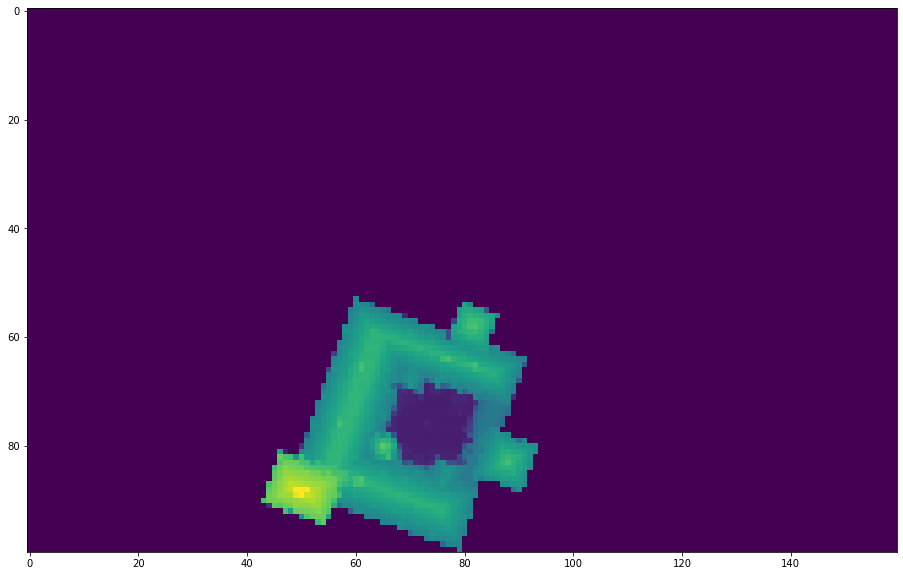

In [44]:
plt.figure(figsize=(20,10))
plt.imshow(chm)

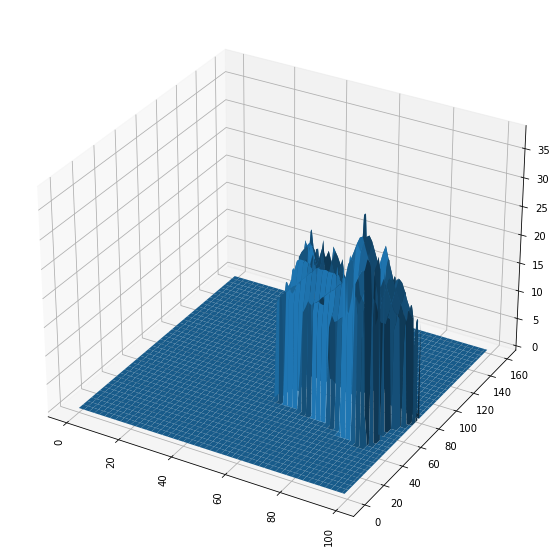

In [48]:
ny, nx = chm.shape
x = np.arange(0,chm.shape[0])
y = np.arange(0,chm.shape[1])
xv, yv = np.meshgrid(x, y)
z = chm[xv,yv]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
plt.xticks(rotation=90)
dem3d=ax.plot_surface(xv,yv,z)
plt.show()

In [46]:
import plotly.graph_objects as go

# x = np.arange(0,chm.shape[0])
# y = np.arange(0,chm.shape[1])
# xv, yv = np.meshgrid(x, y)
# z = chm[xv,yv]

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.show()